Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

importing the house price dataset

> Add blockquote



In [ ]:
house_price_dataset=sklearn.datasets.fetch_california_housing()

In [ ]:
print(house_price_dataset)
#data array -> features of houses
#target array -> prices of houses

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [ ]:
#loading the dataset to a pandas Dataframe
#we have load only data array to our pandas dataframe
house_df=pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names)

In [ ]:
house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
print(house_df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [ ]:
# adding the target column (price) to the DataFrame
house_df['price']=house_price_dataset.target

In [ ]:
house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
print(house_df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  price  
0        -122

In [ ]:
house_df.shape

(20640, 9)

In [ ]:
#checking for missing values
house_df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [ ]:
# statistical measures of the dataset
house_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


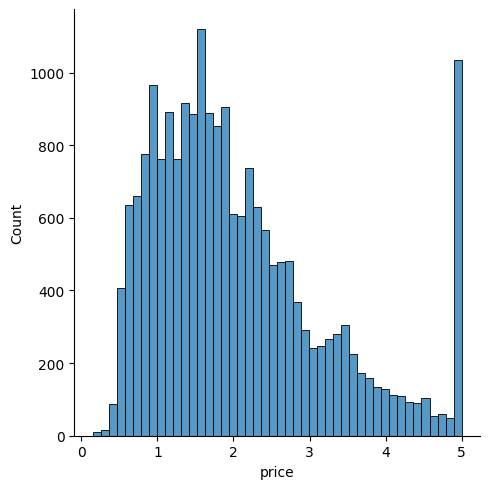

In [ ]:
sns.displot(house_df['price'])

<ipython-input-14-31de2f9db39a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df['price'])


<Axes: xlabel='price', ylabel='Density'>

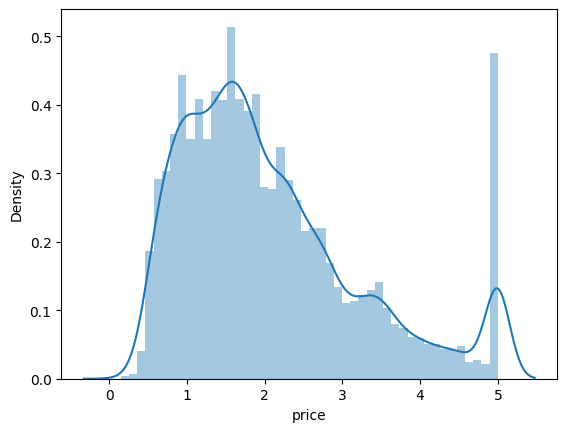

In [ ]:
sns.distplot(house_df['price'])

understanding the correlation between various features in the dataset

In [ ]:
corerealtion=house_df.corr()

<Axes: >

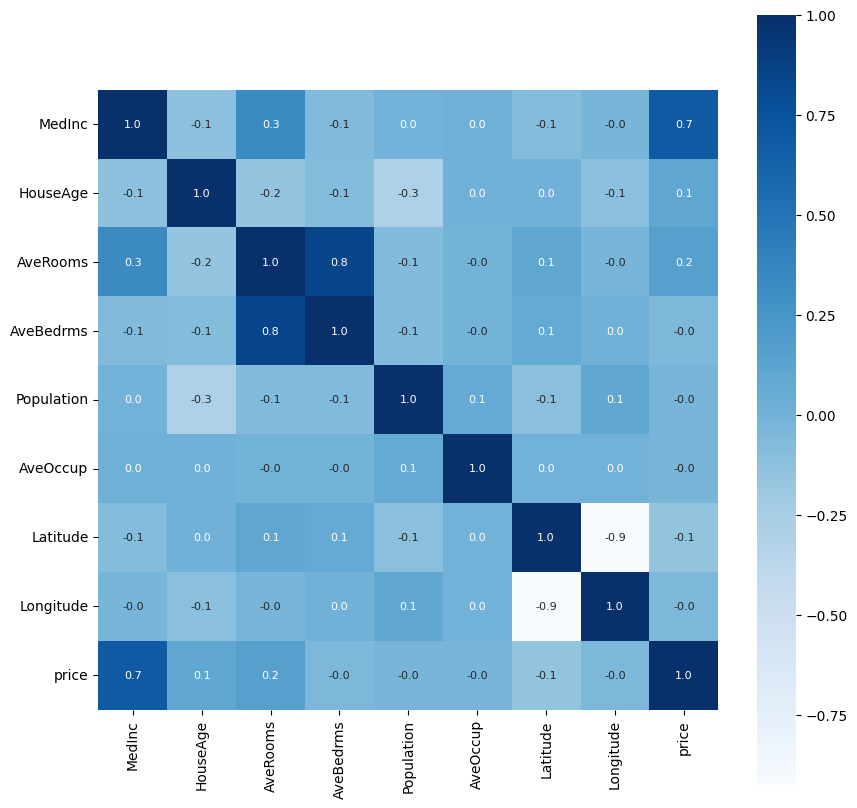

In [ ]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(corerealtion,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

#Seperating features and Target


Splitting the data and target

for dropping column axis =1

 for dropping row axis =0

In [ ]:
X=house_df.drop(['price'],axis=1)
Y=house_df['price']

In [ ]:
print(X)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [ ]:
print(Y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 20640, dtype: float64


#Data standardization

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data=scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 2.34476576  0.98214266  0.62855945 ... -0.04959654  1.05254828
  -1.32783522]
 [ 2.33223796 -0.60701891  0.32704136 ... -0.09251223  1.04318455
  -1.32284391]
 [ 1.7826994   1.85618152  1.15562047 ... -0.02584253  1.03850269
  -1.33282653]
 ...
 [-1.14259331 -0.92485123 -0.09031802 ... -0.0717345   1.77823747
  -0.8237132 ]
 [-1.05458292 -0.84539315 -0.04021111 ... -0.09122515  1.77823747
  -0.87362627]
 [-0.78012947 -1.00430931 -0.07044252 ... -0.04368215  1.75014627
  -0.83369581]]


In [ ]:
X=standardized_data
print(X)

[[ 2.34476576  0.98214266  0.62855945 ... -0.04959654  1.05254828
  -1.32783522]
 [ 2.33223796 -0.60701891  0.32704136 ... -0.09251223  1.04318455
  -1.32284391]
 [ 1.7826994   1.85618152  1.15562047 ... -0.02584253  1.03850269
  -1.33282653]
 ...
 [-1.14259331 -0.92485123 -0.09031802 ... -0.0717345   1.77823747
  -0.8237132 ]
 [-1.05458292 -0.84539315 -0.04021111 ... -0.09122515  1.77823747
  -0.87362627]
 [-0.78012947 -1.00430931 -0.07044252 ... -0.04368215  1.75014627
  -0.83369581]]


In [ ]:
print(Y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 20640, dtype: float64


#splitting the data

Splitting the data into Training data and Test data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [ ]:
print(house_price_dataset.data.std())

621.6720986716564


#Model training

In [ ]:
class Linear_Regression():


  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self,X,Y):

    self.m, self.n=X.shape

    self.w=np.zeros(self.n)
    self.b=0
    self.X=X
    self.Y=Y


    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self,):

    Y_prediction=self.predict(self.X)

    dw=-(2*(self.X.T).dot(self.Y-Y_prediction))/self.m
    db=-2*np.sum(self.Y-Y_prediction)/self.m

    self.w=self.w-self.learning_rate*dw
    self.b=self.b-self.learning_rate*db

  def predict(self,X):

    return X.dot(self.w)+self.b

In [ ]:
model=Linear_Regression(learning_rate=0.02,no_of_iterations=10000)

In [ ]:
#training the model with X_train
model.fit(X_train,Y_train)

In [ ]:
class Lasso_Regression():


  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter


  def fit(self,X,Y):

    self.m, self.n=X.shape

    self.w=np.zeros(self.n)

    self.b=0

    self.X=X

    self.Y=Y



    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):

       Y_prediction=self.predict(self.X)

       dw=np.zeros(self.n)

       for i in range(self.n):

        if(self.w[i]>0):

          dw[i]=(-(2*(self.X[:,i]).dot(self.Y-Y_prediction))+self.lambda_parameter)/self.m

        else:

          dw[i]=(-(2*(self.X[:,i]).dot(self.Y-Y_prediction))-self.lambda_parameter)/self.m

       db=-2 * np.sum(self.Y-Y_prediction)/self.m

       self.w=self.w-self.learning_rate*dw

       self.b=self.b-self.learning_rate*db


  def predict(self,X):

    return X.dot(self.w)+self.b


In [ ]:
model1=Lasso_Regression(learning_rate=0.02,no_of_iterations=15000,lambda_parameter=0.02)

In [ ]:
model1.fit(X_train,Y_train)

#Evaluation

Prediction on training data

In [ ]:
# accuracy for prediction on training data
training_data_prediction=model.predict(X_train)

In [ ]:
print(training_data_prediction)

[0.58807542 3.17425069 0.96796179 ... 1.53687807 1.78476948 1.21883569]


In [ ]:
# R squared error
score_1=metrics.r2_score(Y_train,training_data_prediction)

# mean absolute error
score_2=metrics.mean_absolute_error(Y_train,training_data_prediction)

#mean squared error
score_3=metrics.mean_squared_error(Y_train,training_data_prediction)

In [ ]:
print("R squared error : ",score_1)
print("Mean absolute error : ",score_2)
print("Mean squared error :",score_3)

R squared error :  0.6068205998456939
Mean absolute error :  0.5303857027475679
Mean squared error : 0.521993512908973


Prediction on test data

In [ ]:
#accuracy for prediction on test data
test_data_prediction=model.predict(X_test)

In [ ]:
print(test_data_prediction)

[2.80991017 1.25276895 1.44720172 ... 1.57213375 1.43077765 2.60233972]


In [ ]:
# R squared error
score_1=metrics.r2_score(Y_test,test_data_prediction)

# mean absolute error
score_2=metrics.mean_absolute_error(Y_test,test_data_prediction)

#mean squared error
score_3=metrics.mean_squared_error(Y_test,test_data_prediction)

In [ ]:
print("R squared error : ",score_1)
print("Mean absolute error : ",score_2)
print("Mean squared error :",score_3)

R squared error :  0.6013853270671563
Mean absolute error :  0.5358292548705925
Mean squared error : 0.5369436869950732


#Visualizing the actual prices and predicted prices

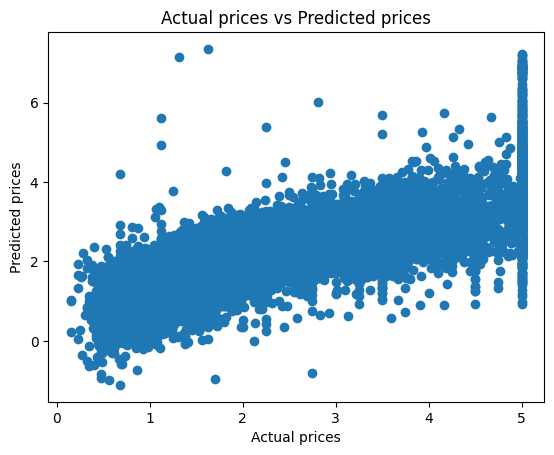

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.show()

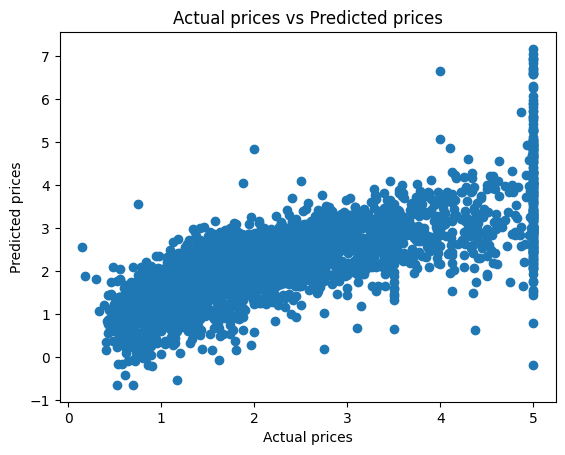

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")
plt.show()